# **Palmer Penguins Classification**

The objective of this dataset is the predict the species of the penguin based on the following parameters:
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g

Here, we will using Decision Tree Classifier to determine whether the species of the penguin is Adelie, Gentoo or Chinstrap.

[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset)

### Step 1: Import the necessary libraries

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

#for finding out the accuracy of the model
from sklearn import metrics

### Step 2: Load the dataset

In [2]:
#read_csv
df=pd.read_csv('penguins.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [3]:
#head
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
#shape
df.shape

(344, 7)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Step 4: Statistical Insights


In [6]:
#describe
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

**Missing Values**

In [7]:
#isnull
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
#dropna
df.dropna(inplace=True)

In [9]:
#checking for null values
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Duplicate Values**

In [10]:
#duplicated
df.duplicated().sum()

np.int64(0)

### Step 6:Feature Selection

We will drop the "island" and "sex" attributes of the penguins dataset, as one island hosts only a single penguin species, and the sex attribute is not crucial for determining the species.

In [11]:
#drop
df=df.drop(['island','sex'],axis=1)

### Step 7: Data Visualisation

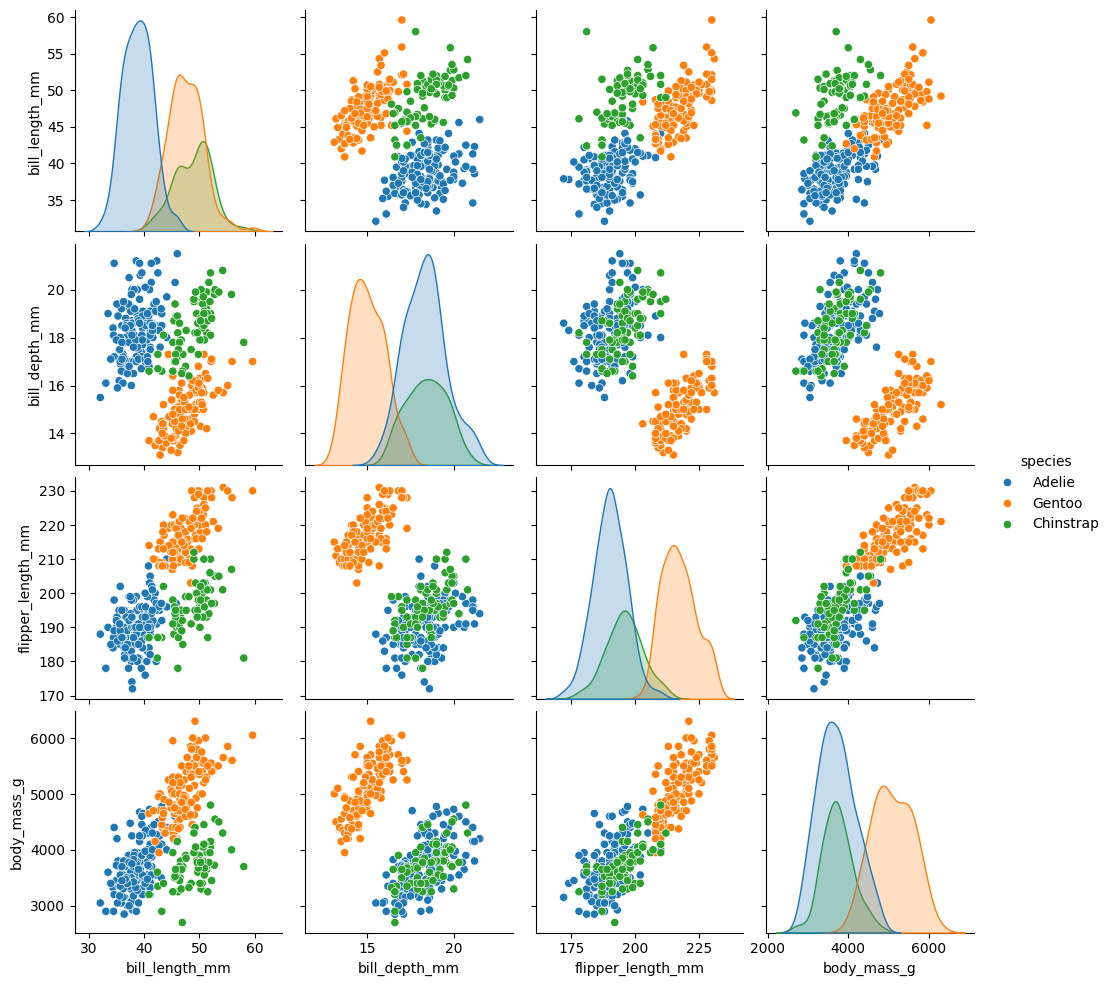

In [12]:
# Visualize the whole dataset
sns.pairplot(df,hue='species')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Using the **Decision Tree Classifier** Algorithm
  - Allow us to classify penguins in species using certain parameters

**Training and Testing Sets**

In [13]:
# x values are features
x=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].values
x[0:5]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ]])

In [14]:
# y value is the target
y=df['species'].values
y[0:5]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [15]:
# train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [16]:
#shape of train and test set
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((233, 4), (233,), (100, 4), (100,))

**Data Modelling and Fitting**

In [17]:
# clf , entropy
clf=DecisionTreeClassifier(criterion="entropy")

In [18]:
# fit
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
# predict
y_pred=clf.predict(x_test)

**Decision Tree Visualisation**

In the decision tree below:  
- `x[0]` represents *bill_length_mm*  
- `x[1]` represents *bill_depth_mm*  
- `x[2]` represents *flipper_length_mm*  
- `x[3]` represents *body_mass_g*  

- Entropy: A measure of randomness or uncertainty. Our primary goal is to reduce this randomness to arrive at a clear conclusion.  
- Samples: The total number of penguins at a given node.  
- Value: The distribution of penguins at a node, represented as `[Adelie count, Gentoo count, Chinstrap count]`.  

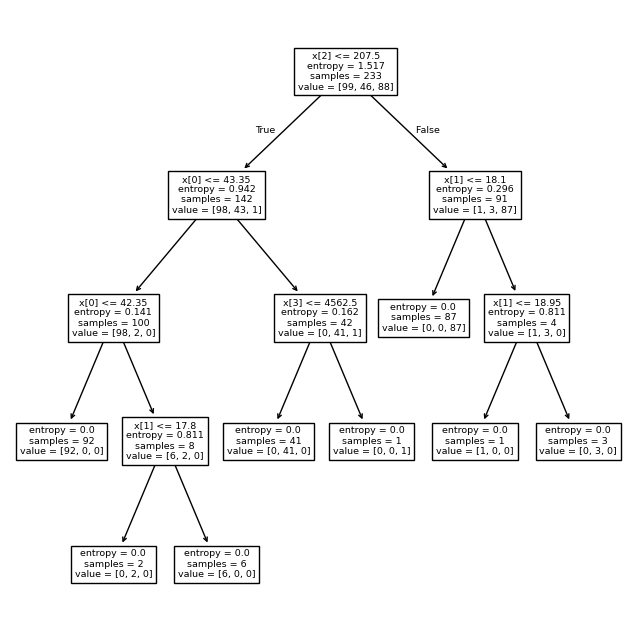

In [20]:
#figure
#plot_tree
#plt show

plt.figure(figsize=(8,8))
tree.plot_tree(clf)
plt.show()

### Step 9: Model Evaluation

In [21]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.93


### Step 10: Testing the Model

- Take user input and predict the output

In [22]:
#inp func
# np array
# outp func

inp=[]

inp_len= int(input('Enter the number of sets you want to predict: '))

for val in range(inp_len):
    print('\nSet ',val+1,': ')
    ele = [float(input('bill_length_mm')),float(input('bill_depth_mm')),float(input('flipper_length_mm')),float(input('body_mass_g'))]
    inp.append(ele)

X_new= np.array(inp)

Y_pred=clf.predict(X_new)

print('\nAnswers')
for ans in range(inp_len):
    print('\nSet ',ans+1,': ')
    print('bill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g')
    print(inp[ans][0],'\t\t',inp[ans][1],'\t\t',inp[ans][2],'\t\t\t',inp[ans][3])
    print("Predicted class: ",Y_pred[ans])


Set  1 : 

Set  2 : 

Answers

Set  1 : 
bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
20.0 		 21.0 		 210.0 			 3450.0
Predicted class:  Chinstrap

Set  2 : 
bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
50.4 		 16.8 		 220.0 			 5004.0
Predicted class:  Gentoo
